# $\color{blue}{\text{TP 3 IIA : Application de la régression logistique - Partie 1}}$

## <font color="#1abc9c">Introduction</font>

**Objectifs du TP :**

Mise en oeuvre de la régression logistique. L'objectif est de faire le lien entre ce que calcul et retourne le modèle 'LogisticRegression' de scikit-learn (la 'pratique'), et ce qui a été vu en cours (la 'théorie') : équation du modèle, paramètres, apprentissage des paramètres, évaluation du modèle.

L'évaluation du modèle reprend les notions vues au TP1.


In [1]:
# importation des librairies nécéssaires
# pour calcul numerique, chargement des données, visualisation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tpiia_utils

# fonctions de scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

## <font color="#1abc9c">1. Chargement et analyse des données</font>

Une tache d'apprentissage commence toujours par l'analyse des données.

<font color="red">**Question 1:**</font>
- Combien y'a-t-il d'exemples $\boldsymbol{x}^{(1)}, \boldsymbol{x}^{(2)},...\boldsymbol{x}^{(m)}$ dans le jeu de données ?
- Quelle est la variable cible $y$ ?
- Quelles sont les classes ?
- Combien y'a-t-il d'attributs $x_1, x_2,...x_d$ ?
- Quelle est la répartition des exemples par classe ?

In [2]:
cv_df=pd.read_csv('./data/data_exam.txt', sep=' ')

print("Résumé des données")
cv_df.info()

print("\n Nombre de valeurs uniques dans la colonne 'Reussite' et nombre d'instances prenant chacune de ces valeurs")
print(cv_df.groupby('Reussite')["Note1"].count())

# Affichage des 5 premieres lignes du dataframe
cv_df.head()

Résumé des données
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Note1     100 non-null    float64
 1   Note2     100 non-null    float64
 2   Reussite  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB

 Nombre de valeurs uniques dans la colonne 'Reussite' et nombre d'instances prenant chacune de ces valeurs
Reussite
0    40
1    60
Name: Note1, dtype: int64


,Note1,Note2,Reussite
0,94.83,45.69,1
1,40.24,71.17,0
2,75.48,90.42,1
3,91.56,88.70,1
4,74.79,41.57,0


<Axes: xlabel='Note1', ylabel='Note2'>

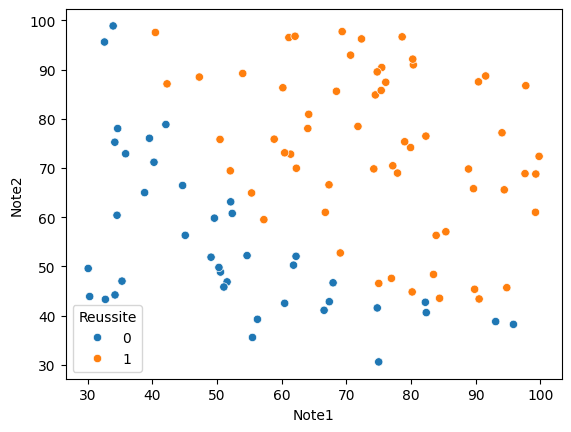

In [3]:
# Visualisation des données
%matplotlib inline
import seaborn as sns

sns.scatterplot(x=cv_df.iloc[:, 0],y=cv_df.iloc[:, 1],hue=cv_df.iloc[:, 2])

## <font color="#1abc9c">2. Apprentissage du modèle régression logistique</font>

La régression logistique est utilisée comme modèle de classification.

<font color="red">**Question 2:**</font> Rappelez l'équation du modèle dans notre cas (2 attributs). Combien de coefficients (paramètres) doivent être estimés ?

<font color="red">**Question 3:**</font> De la minimisation de quelle fonction ces paramètres sont-ils solution ? Rappelez comment la solution de cette équation (et donc la valeur des paramètres) peut être trouvée.

La classe 'LogisticRegression()' implémente la régression logistique dans scikit-learn. Pour l'appliquer, il faut au préalable :
- formater les données labélisées dont nous disposons en matrice des attributs $X$ et vecteur des labels $y$
- former l'ensemble d'apprentissage et l'ensemble de test

La fonction 'fit()' réalise l'apprentissage. Le modèle résultant est stocké dans la variable 'logreg1', dont le nom est arbitrairement choisi.


In [4]:
# Define the X (input) and y (target) features
X = cv_df.drop('Reussite', axis=1)
y = cv_df['Reussite']

# conversion numpy array
X = X.to_numpy()
y = y.to_numpy()


# Split into train (1/3) and test (2/3) sets
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=5)


<Axes: >

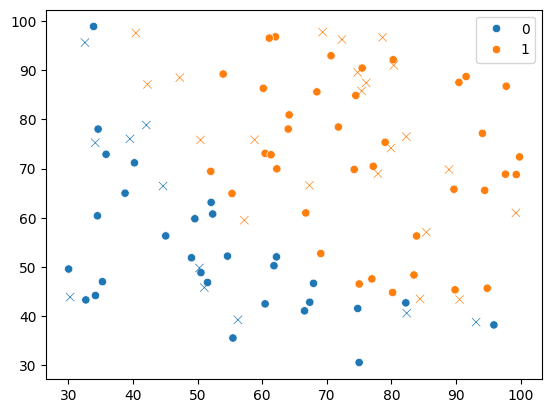

In [5]:
# Visualisation des données d'apprentissage et des données de test
sns.scatterplot(x=X_train[:, 0],y=X_train[:, 1],hue=y_train)
sns.scatterplot(x=X_test[:, 0],y=X_test[:, 1],hue=y_test,marker="x",legend = False)

In [6]:
# instantiate the model (using the default parameters)
logreg1 = LogisticRegression()

# fit the model with data
logreg1.fit(X_train,y_train)
print("Estimated coefficients :",logreg1.coef_)
print("Bias :",logreg1.intercept_)

Estimated coefficients : [[0.21778852 0.20492362]]
Bias : [-25.97016851]


In [7]:
70*logreg1.coef_[0,0] + 50*logreg1.coef_[0,1] + logreg1.intercept_

array([-0.47879072])

In [8]:
print( np.log(logreg1.coef_[0,0])*70 )
print(  np.log(logreg1.coef_[0,1])*50 )

logreg1.intercept_

-106.69615363179824
-79.25589676549231


array([-25.97016851])

<font color="red">**Question 4:**</font>  A l'issue de l'apprentissage, quelle est la valeur des paramètres du modèle ?

<font color="red">**Question 5:**</font>  Calculez "à la main" (vous pouvez utliser la console python quand même) la valeur prédite par le modèle pour un exemple $\boldsymbol{x}=[70,50]$. Vous détaillerez le calcul. Que représente cette valeur ?

*Remarque*: calcul de l'exponentiel : <code>np.exp(x)</code>

<font color="red">**Question 6:**</font>  Quelle est la classe de $\boldsymbol{x}$ ? Justifiez votre réponse.

<font color="red">**Question 7:**</font>  Comparez votre résultat à celui fournit par le modèle appris, en utilisant la fonction <code>predict_proba(x)</code>. 

<font color="red">**Question 8:**</font>  Quelle est la classe retournée par le modèle ? (fonction <code>predict(x)</code>)


In [9]:
x = np.array([70,50]).reshape(1, -1)
print("x = ", x[0][0],x[0][1])

# TODO : calcul de la valeur prédite par le modèle et de la classe
print( logreg1.predict_proba(x) )

logreg1.predict(x)

x =  70 50
[[0.61746228 0.38253772]]


array([0])

On affiche ci-dessous l'histogramme des valeurs de $\boldsymbol{w}^T \boldsymbol{x}$ et $h_w(\boldsymbol{x})$ pour l'ensemble d'apprentissage.

<font color="red">**Question 9:**</font> Comment interpréter géométriquement la valeur $\boldsymbol{w}^T \boldsymbol{x}$ pour un exemple $x$ donné ?

<font color="red">**Question 10:**</font> Quelle caractéristique du modèle peut-on déduire de l'histogramme des valeurs $h_w(\boldsymbol{x})$ ? Quelle serait l'allure de cet histogramme pour un "mauvais" (*poor*) modèle ? Justifiez votre réponse.


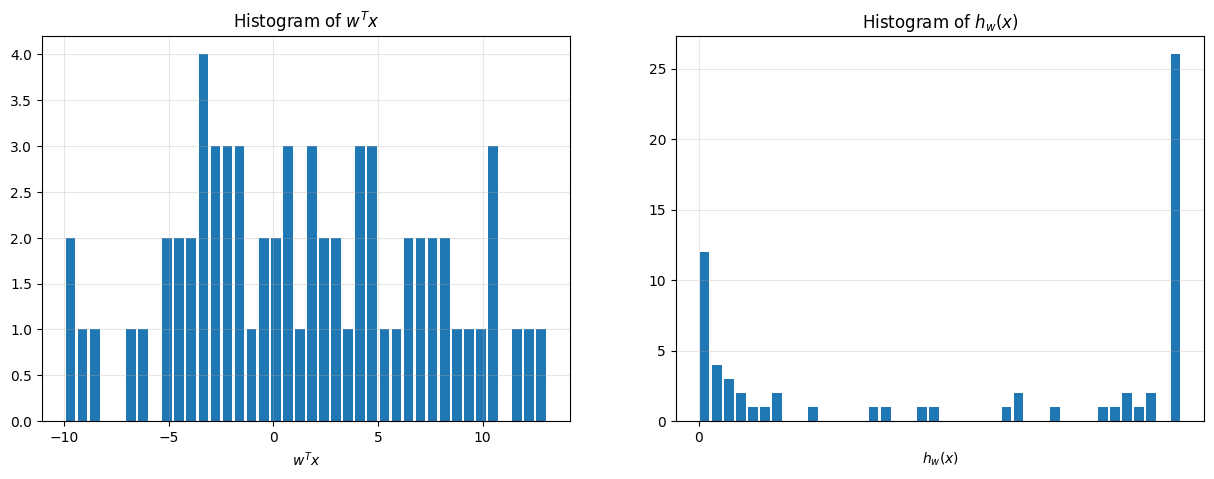

In [10]:
import tpiia_utils
tpiia_utils.plot_hist_logreg_output(logreg1, X_train)


## <font color="#1abc9c">3. Evaluation du modèle régression logistique</font>

La fonction 'predict(X)' réalise la prédiction, ie retourne les valeurs prédites par le modèle appris ('lreg_model1' dans notre cas) pour les exemples $X$ passés en argument.

Comme dans le TP1, nous pouvons calculer l'accuracy et la matrice de confusion sur l'ensemble de test.


Accuracy: 0.8787878787878788


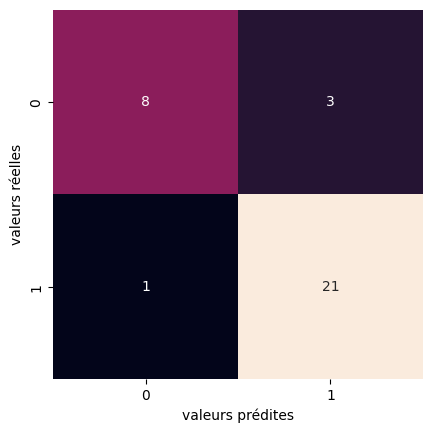

In [11]:
# Evaluation du modele
y_pred=logreg1.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

conf = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf, square=True, annot=True, cbar=False, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');

<font color="red">**Question 11:**</font> Repérez visuellement les exemples mal classées. Quelle est l'équation de la surface séparatrice ? (frontière de décision)

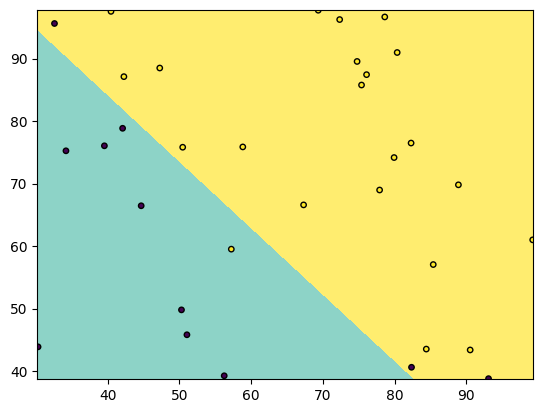

In [12]:
# visualisation de la frontiere de decision
tpiia_utils.plot_boundary(logreg1, X_test, y_test)

In [13]:
0.21778852
0.20492362

0.20492362

En comparant les prédictions $\hat{y}$ avec les valeurs réelles $y$ (<code>y_test!=y_pred</code>), on peut identifier l'indice des exemples mal classés, i.e. les lignes correspondant à ces exemples dans la matrice d'entrée (<code>np.where()</code>).

<font color="red">**Question 12:**</font> Calculez la valeur $h_w(\boldsymbol{x})$ pour un exemple mal classé. Faites de même pour un exemple bien classé (fonction <code>predict_proba()</code>). Interprétez et commentez les résultats obtenus.

In [14]:
# indices des exemples mal classés
print(np.where(y_test!=y_pred))

# accès à l'exemple d'indice 'idx' dans l'ensemble de test
idx=9 # TO COMPLETE
x_test=X_test[idx,:].reshape(1, -1)

# TODO: calcul hw(x_test)
print( logreg1.predict_proba(x_test) )
print( logreg1.predict(x_test) )



(array([ 9, 20, 24, 31]),)
[[0.09456248 0.90543752]]
[1]


<font color="red">**Question 13:**</font> Estimez l'accuracy du modèle par validation croisée à 3 plis. Comparez avec la valeur trouvée sur l'ensemble de test.

In [15]:
# TODO: evaluation par validation croisée à 3 plis
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg1, X, y, cv=3)
print(scores)

[0.85294118 0.96969697 0.84848485]
